In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Can The Missing values be an indicator of something?

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(add_indicator=True,strategy='most_frequent')
#df3=df2.copy()
save=imputer.fit_transform(pd.DataFrame(df.Age))

In [6]:
df['Missing_Age']=save[:,1]

In [7]:
df['Age']=save[:,0]

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Missing_Age      0
dtype: int64

Since canbin has much nuber of missing values drop it entirely but account for missingness of data

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(add_indicator=True,strategy='constant')
#df3=df2.copy()
save=imputer.fit_transform(pd.DataFrame(df.Cabin))

In [11]:
Missing_2=save[:,1]

In [12]:
df['Missing_2']=pd.DataFrame(Missing_2).astype(int)

In [13]:
df['Missing_Age']=df['Missing_Age'].astype(int)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age,Missing_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Missing_Age      0
Missing_2        0
dtype: int64

## Outliers

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

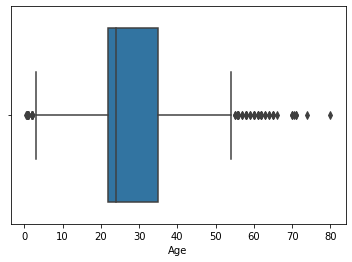

In [16]:
import seaborn as sns
sns.boxplot(df['Age'])

In [17]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr=q3-q1
minimum = q1-(1.5*iqr)
minimum
maximum = q3+(1.5*iqr)
maximum
df=df[(df['Age']<maximum) & (df['Age']>minimum)]

In [18]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr=q3-q1
minimum = q1-(1.5*iqr)
minimum
maximum = q3+(1.5*iqr)
maximum
df=df[(df['Fare']<maximum) & (df['Fare']>minimum)]

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age,Missing_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

df['Age'] = label_encoder.fit_transform(df['Age'])

df['SibSp'] = label_encoder.fit_transform(df['SibSp'])

df['Parch'] = label_encoder.fit_transform(df['Parch'])

df['Fare'] = label_encoder.fit_transform(df['Fare'])

df['Sex'] = label_encoder.fit_transform(df['Sex'])

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age,Missing_2
0,1,0,2,"Braund, Mr. Owen Harris",1,21,1,0,A/5 21171,17,NaN,2,0,1
2,3,1,2,"Heikkinen, Miss. Laina",0,27,0,0,STON/O2. 3101282,40,NaN,2,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,40,1,0,113803,182,C123,2,0,0
4,5,0,2,"Allen, Mr. William Henry",1,40,0,0,373450,42,NaN,2,0,1
5,6,0,2,"Moran, Mr. James",1,24,0,0,330877,50,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,28,0,0,211536,82,NaN,2,0,1
887,888,1,0,"Graham, Miss. Margaret Edith",0,17,0,0,112053,149,B42,2,0,0
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,24,1,2,W./C. 6607,127,NaN,2,1,1
889,890,1,0,"Behr, Mr. Karl Howell",1,27,0,0,111369,149,C148,0,0,0


In [22]:
X=df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Missing_Age','Missing_2']]
Y=df.loc[:,['Survived']]

In [23]:
X.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Missing_Age    0
Missing_2      0
dtype: int64

## Scaling The Data

In [24]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Missing_Age,Missing_2
0,2,1,21,1,0,17,2,0,1
2,2,0,27,0,0,40,2,0,1
3,0,0,40,1,0,182,2,0,0
4,2,1,40,0,0,42,2,0,1
5,2,1,24,0,0,50,1,1,1
...,...,...,...,...,...,...,...,...,...
886,1,1,28,0,0,82,2,0,1
887,0,0,17,0,0,149,2,0,0
888,2,0,24,1,2,127,2,1,1
889,0,1,27,0,0,149,0,0,0


In [25]:
#Scale Age and Fare
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()
feature_scale = ['Age','Fare']
X[feature_scale] = sts.fit_transform(X[feature_scale])

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Missing_Age,Missing_2
0,2,1,-0.569926,1,0,-1.208187,2,0,1
2,2,0,-0.118263,0,0,-0.779664,2,0,1
3,0,0,0.860342,1,0,1.865994,2,0,0
4,2,1,0.860342,0,0,-0.742402,2,0,1
5,2,1,-0.344095,0,0,-0.593350,1,1,1
...,...,...,...,...,...,...,...,...,...
886,1,1,-0.042986,0,0,0.002854,2,0,1
887,0,0,-0.871036,0,0,1.251158,2,0,0
888,2,0,-0.344095,1,2,0.841267,2,1,1
889,0,1,-0.118263,0,0,1.251158,0,0,0


Looks good Enough 

## Approach 1

In [27]:
##Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

In [29]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,Y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [30]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.770212,{'criterion': 'gini'}
1,KNeighborsClassifier,0.802282,{'n_neighbors': 5}
2,SVC,0.805031,"{'C': 10, 'kernel': 'rbf'}"


In [31]:
#detailed Summary
model_selection.cv_results_

{'mean_fit_time': array([0.00957451, 0.00538263, 0.01136966, 0.00877752, 0.00678601,
        0.00957947, 0.01075759, 0.0139626 , 0.00698128, 0.02812448,
        0.96103435, 0.00917516]),
 'std_fit_time': array([7.98034711e-04, 4.85254983e-04, 4.88558459e-04, 3.99425844e-04,
        1.17152283e-03, 8.06132181e-04, 3.92486186e-04, 4.76228543e-03,
        6.29922129e-04, 2.77868356e-03, 5.47063098e-01, 1.46535021e-03]),
 'mean_score_time': array([0.00558491, 0.00219712, 0.00319147, 0.00498557, 0.00179095,
        0.00239377, 0.00400567, 0.0019948 , 0.00239353, 0.00458808,
        0.0021987 , 0.00279269]),
 'std_score_time': array([4.88480452e-04, 3.97672373e-04, 3.99112958e-04, 1.92514698e-06,
        3.96912256e-04, 4.88855548e-04, 2.01821010e-05, 4.62310777e-07,
        4.89259077e-04, 4.88675073e-04, 3.96462613e-04, 3.99399145e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, Fa

In [32]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [33]:
model_svc = SVC(C= 10,kernel='rbf')

In [34]:
model_svc.fit(X_train,Y_train)

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10)

In [35]:
model_svc.score(X_test,Y_test)

0.7847222222222222

Dropping the Missing_Value Imputations and Running

In [36]:
X=X.iloc[:,:-2]

In [37]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,-0.569926,1,0,-1.208187,2
2,2,0,-0.118263,0,0,-0.779664,2
3,0,0,0.860342,1,0,1.865994,2
4,2,1,0.860342,0,0,-0.742402,2
5,2,1,-0.344095,0,0,-0.593350,1
...,...,...,...,...,...,...,...
886,1,1,-0.042986,0,0,0.002854,2
887,0,0,-0.871036,0,0,1.251158,2
888,2,0,-0.344095,1,2,0.841267,2
889,0,1,-0.118263,0,0,1.251158,0


In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [39]:
model_svc = SVC(C= 10,kernel='rbf')

In [40]:
model_svc.fit(X_train,Y_train)

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10)

In [41]:
model_svc.score(X_test,Y_test)

0.8541666666666666

Turns out too much Variables Ruin the Performance of Model.\
Then Lets Try dropping Some more

In [42]:
!pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [43]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.values, Y_train.values.ravel())

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	3
Iteration: 	17 / 

In [44]:
X_filtered.shape

(574, 3)

In [45]:
Y_train.shape

(574, 1)

In [46]:
model_svc = SVC(C= 10,kernel='rbf')
model_svc.fit(X_filtered,Y_train.values)
#model_svc.score(X_test,Y_test)

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10)

In [47]:
feat_selector.n_features_ 

3

In [48]:
feat_selector.ranking_

array([1, 1, 2, 3, 5, 1, 4])

In [49]:
X_test.drop(columns=['SibSp','Parch','Embarked'],inplace=True)

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
X_test

,Pclass,Sex,Age,Fare
76,2,1,-0.344095,-0.798296
510,2,1,0.182846,-0.984610
691,2,0,-2.075472,0.021486
654,2,0,-0.946313,-1.413132
867,0,1,0.408678,1.772837
...,...,...,...,...
790,2,1,-0.344095,-0.984610
126,2,1,-0.344095,-0.984610
888,2,0,-0.344095,0.841267
14,2,0,-1.322699,-0.872821


In [53]:
X_filtered.shape

(574, 3)

In [51]:
model_svc.score(X_test,Y_test)

ValueError: X.shape[1] = 4 should be equal to 3, the number of features at training time

## Approach_2:Vote Classifier

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age,Missing_2
0,1,0,2,"Braund, Mr. Owen Harris",1,21,1,0,A/5 21171,17,NaN,2,0,1
2,3,1,2,"Heikkinen, Miss. Laina",0,27,0,0,STON/O2. 3101282,40,NaN,2,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,40,1,0,113803,182,C123,2,0,0
4,5,0,2,"Allen, Mr. William Henry",1,40,0,0,373450,42,NaN,2,0,1
5,6,0,2,"Moran, Mr. James",1,24,0,0,330877,50,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,28,0,0,211536,82,NaN,2,0,1
887,888,1,0,"Graham, Miss. Margaret Edith",0,17,0,0,112053,149,B42,2,0,0
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,24,1,2,W./C. 6607,127,NaN,2,1,1
889,890,1,0,"Behr, Mr. Karl Howell",1,27,0,0,111369,149,C148,0,0,0


Now that we know Missing_Age and Missing_2 are not that Important don't take them.

In [81]:
X=df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y=df.loc[:,['Survived']]

In [82]:
#from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [83]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf1=SVC(C= 10,kernel='rbf')
clf2 = LogisticRegression(multi_class='multinomial', random_state=1)
clf3 = RandomForestClassifier(n_estimators=50, random_state=1)
clf4 = GaussianNB()
clf5=KNeighborsClassifier(n_neighbors=5)
eclf1 = VotingClassifier(estimators=[
          ('LR', clf2), ('RF', clf3),('Gb',clf4),('KNN',clf5)], voting='hard')

In [84]:
eclf1.fit(X_train,Y_train)

C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\arish\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('Gb', GaussianNB()),
                             ('KNN', KNeighborsClassifier())])

In [85]:
eclf1.score(X_test,Y_test)

0.8263888888888888

Wow 84% accuracy that's the best one we have got so Far.

In [86]:
df_test=pd.read_csv('test.csv')

In [87]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [88]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
#df3=df2.copy()
df_test['Age']=imputer.fit_transform(pd.DataFrame(df_test.Age))

In [90]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [92]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [94]:
#df_test[feature_scale] = sts.fit_transform(df_test[feature_scale])
mean=df['Age'].mean()
std=df['Age'].std()
df_test['Age']=(df_test['Age']-mean)/std

In [96]:
mean_f=df['Fare'].mean()
std_f=df['Fare'].std()
df_test['Fare']=(df_test['Fare']-mean_f)/std_f

In [110]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.446006,0,0,330911,-1.378091,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.386316,1,0,363272,-1.393529,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,2.514688,0,0,240276,-1.343492,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,-0.118181,0,0,315154,-1.362576,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.494305,1,1,3101298,-1.295084,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.569529,0,0,A.5. 3236,-1.373980,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.784517,0,0,PC 17758,0.503688,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.746905,0,0,SOTON/O.Q. 3101262,-1.388874,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,-0.569529,0,0,359309,-1.373980,NaN,S


In [111]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,21,1,0,17,2
2,2,0,27,0,0,40,2
3,0,0,40,1,0,182,2
4,2,1,40,0,0,42,2
5,2,1,24,0,0,50,1
...,...,...,...,...,...,...,...
886,1,1,28,0,0,82,2
887,0,0,17,0,0,149,2
888,2,0,24,1,2,127,2
889,0,1,27,0,0,149,0


In [112]:
X_submit=df_test.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [113]:
X_submit.shape

(418, 7)

In [114]:
X_submit

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.446006,0,0,-1.378091,Q
1,3,female,1.386316,1,0,-1.393529,S
2,2,male,2.514688,0,0,-1.343492,Q
3,3,male,-0.118181,0,0,-1.362576,S
4,3,female,-0.494305,1,1,-1.295084,S
...,...,...,...,...,...,...,...
413,3,male,-0.569529,0,0,-1.373980,S
414,1,female,0.784517,0,0,0.503688,C
415,3,male,0.746905,0,0,-1.388874,S
416,3,male,-0.569529,0,0,-1.373980,S


In [115]:
X_submit['Sex'] = label_encoder.fit_transform(X_submit['Sex'])
X_submit['Embarked'] = label_encoder.fit_transform(X_submit['Embarked'])

In [116]:
X_submit

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.446006,0,0,-1.378091,1
1,3,0,1.386316,1,0,-1.393529,2
2,2,1,2.514688,0,0,-1.343492,1
3,3,1,-0.118181,0,0,-1.362576,2
4,3,0,-0.494305,1,1,-1.295084,2
...,...,...,...,...,...,...,...
413,3,1,-0.569529,0,0,-1.373980,2
414,1,0,0.784517,0,0,0.503688,0
415,3,1,0.746905,0,0,-1.388874,2
416,3,1,-0.569529,0,0,-1.373980,2


In [117]:
pred_submit=eclf1.predict(X_submit)

In [118]:
pred_submit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
submission_Trick = pd.DataFrame({
        "PassengerId": df_test['PassengerId'],
        "Survived": pred_submit
    })

In [120]:
submission_Trick.to_csv('titanic_submission_Mod.csv', index=False)

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Accuracy_=[]
Best_Accuracy=-1
for k in range(5,50):
    cv = KFold(n_splits=k, random_state=1, shuffle=True)
    # create model
    #model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(eclf1, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    Accuracy=np.mean(scores)
    Accuracy_.append(np.mean(scores))
    Best_Accuracy=max(Best_Accuracy,Accuracy)

Text(0, 0.5, 'Accuracy Score')

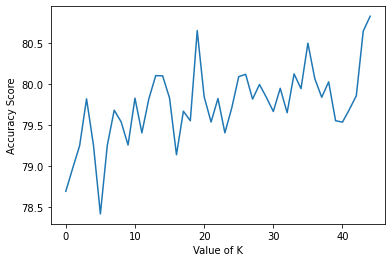

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(45),np.array(Accuracy_)*100)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut

In [135]:
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [138]:
def evaluate_model(cv, model):
	# get the dataset
	#X, y = get_dataset()
	# evaluate the model
	scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return np.mean(scores)

In [140]:
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if np.isnan(cv_mean) or np.isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

>LogisticRegression: ideal=0.788, cv=0.791
>RidgeClassifier: ideal=0.786, cv=0.776
>SGDClassifier: ideal=0.624, cv=0.606
>PassiveAggressiveClassifier: ideal=0.624, cv=0.597
>KNeighborsClassifier: ideal=0.677, cv=0.674
>DecisionTreeClassifier: ideal=0.776, cv=0.780
>ExtraTreeClassifier: ideal=0.760, cv=0.759
>LinearSVC: ideal=0.744, cv=0.622
>SVC: ideal=0.662, cv=0.651
>GaussianNB: ideal=0.777, cv=0.776
>AdaBoostClassifier: ideal=0.818, cv=0.801
>BaggingClassifier: ideal=0.820, cv=0.794
>RandomForestClassifier: ideal=0.795, cv=0.788
>ExtraTreesClassifier: ideal=0.791, cv=0.784
>GaussianProcessClassifier: ideal=0.682, cv=0.675
>GradientBoostingClassifier: ideal=0.827, cv=0.808
>LinearDiscriminantAnalysis: ideal=0.777, cv=0.776
>QuadraticDiscriminantAnalysis: ideal=0.786, cv=0.784
